In [148]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import torch

## Guide to shapes

##### Filter by id
- Returns 1 x height x weight

##### Length of data
- Train - 400
- Eval - 400
- Test - 400

In [149]:
# File paths
test_challenge_file_path = 'arc-prize-2024/arc-agi_test_challenges.json'
training_challenge_file_path = 'arc-prize-2024/arc-agi_training_challenges.json'
training_solutions_file_path = 'arc-prize-2024/arc-agi_training_solutions.json'
evaluation_challenge_file_path = 'arc-prize-2024/arc-agi_evaluation_challenges.json'
evaluation_solutions_file_path = 'arc-prize-2024/arc-agi_evaluation_solutions.json'

# Load JSON files
with open(test_challenge_file_path, 'r') as file:
    test_challenges_data = json.load(file)

with open(training_challenge_file_path, 'r') as file:
    training_challenges_data = json.load(file)

with open(training_solutions_file_path, 'r') as file:
    training_solutions_data = json.load(file)

with open(evaluation_challenge_file_path, 'r') as file:
    evaluation_challenges_data = json.load(file)

with open(evaluation_solutions_file_path, 'r') as file:
    evaluation_solutions_data = json.load(file)

# Function to convert JSON data to DataFrame
# Function to convert JSON data to DataFrame
def json_to_dataframe(challenges_data, solutions_data=None):
    """
    Convert JSON data to a DataFrame.
    :param challenges_data: JSON data containing challenges.
    :param solutions_data: JSON data containing solutions.

    :return: DataFrame containing challenges and solutions.
    """
    records = []
    for key, value in challenges_data.items():
        record = {
            'id': key,
            'train': [
                {
                    'input': item['input'],
                    'output': item['output']
                }
                for item in value['train']
            ] if 'train' in value else [],
            'test': [
                {
                    'input': item['input'],
                }
                for item in value['test']
            ] if 'test' in value else []
        }
        if solutions_data and key in solutions_data:
            for i, item in enumerate(record['test']):
                item['solution'] = solutions_data[key][i] if i < len(solutions_data[key]) else None
        records.append(record)
    return pd.DataFrame(records)

# Convert JSON data to DataFrames
test_challenges_df = json_to_dataframe(test_challenges_data)
training_challenges_df = json_to_dataframe(training_challenges_data, training_solutions_data)
evaluation_challenges_df = json_to_dataframe(evaluation_challenges_data, evaluation_solutions_data)

# Display the DataFrames
print("Test Challenges DataFrame:")
print(test_challenges_df.head())
print("\nTraining Challenges DataFrame:")
print(training_challenges_df.head())
print("\nEvaluation Challenges DataFrame:")
print(evaluation_challenges_df.head())

# Save DataFrames to CSV files
test_challenges_df.to_csv('test_challenges_data.csv', index=False)
training_challenges_df.to_csv('training_challenges_data.csv', index=False)
evaluation_challenges_df.to_csv('evaluation_challenges_data.csv', index=False)

Test Challenges DataFrame:
         id                                              train  \
0  007bbfb7  [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], ...   
1  00d62c1b  [{'input': [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0...   
2  017c7c7b  [{'input': [[0, 1, 0], [1, 1, 0], [0, 1, 0], [...   
3  025d127b  [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6...   
4  045e512c  [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                test  
0     [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}]  
1  [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [{'input': [[1, 1, 1], [0, 1, 0], [0, 1, 0], [...  
3  [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0...  
4  [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

Training Challenges DataFrame:
         id                                              train  \
0  007bbfb7  [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], ...   
1  00d62c1b  [{'input': [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0...   
2  017c7c7b  [{'

In [150]:
# Define function to visualize each data

def filter_data_by_id(id, dataframe, solution=True):
    """
    Filter data by id
    :param id: id of the data
    :param dataframe: dataframe to filter
    :param solution: whether to return solution or not
        
    :return: test_data_input, test_data_solution, train_data_inputs, train_data_outputs
    """
    
    data = dataframe[dataframe['id'] == id]

    test_data = data['test']
    test_data_input = test_data.iloc[0][0]['input']
    if solution:
        test_data_solution = test_data.iloc[0][0]['solution']

    train_data = data['train']
    train_data_inputs = [i['input'] for i in train_data.iloc[0]]
    train_data_outputs = [i['output'] for i in train_data.iloc[0]]

    test_data = data['test']
    test_data_input = test_data.iloc[0][0]['input']

    if solution:
        test_data_solution = test_data.iloc[0][0]['solution']
        return test_data_input, test_data_solution, train_data_inputs, train_data_outputs
    return test_data_input, train_data_inputs, train_data_outputs

In [151]:
a, b, c, d = filter_data_by_id('007bbfb7', training_challenges_df)
# display(a, b, c, d)
e, f, g, h = filter_data_by_id('00576224', evaluation_challenges_df)
#display(e, f, g, h)
i, j, k = filter_data_by_id('007bbfb7', test_challenges_df, solution=False)
#display(i, j, k)



In [152]:
train_ids = training_challenges_df['id'].values
eval_ids = evaluation_challenges_df['id'].values
test_ids = test_challenges_df['id'].values

print(len(training_challenges_df['id'].values))
print(len(evaluation_challenges_df['id'].values))
print(len(test_challenges_df['id'].values))

400
400
100


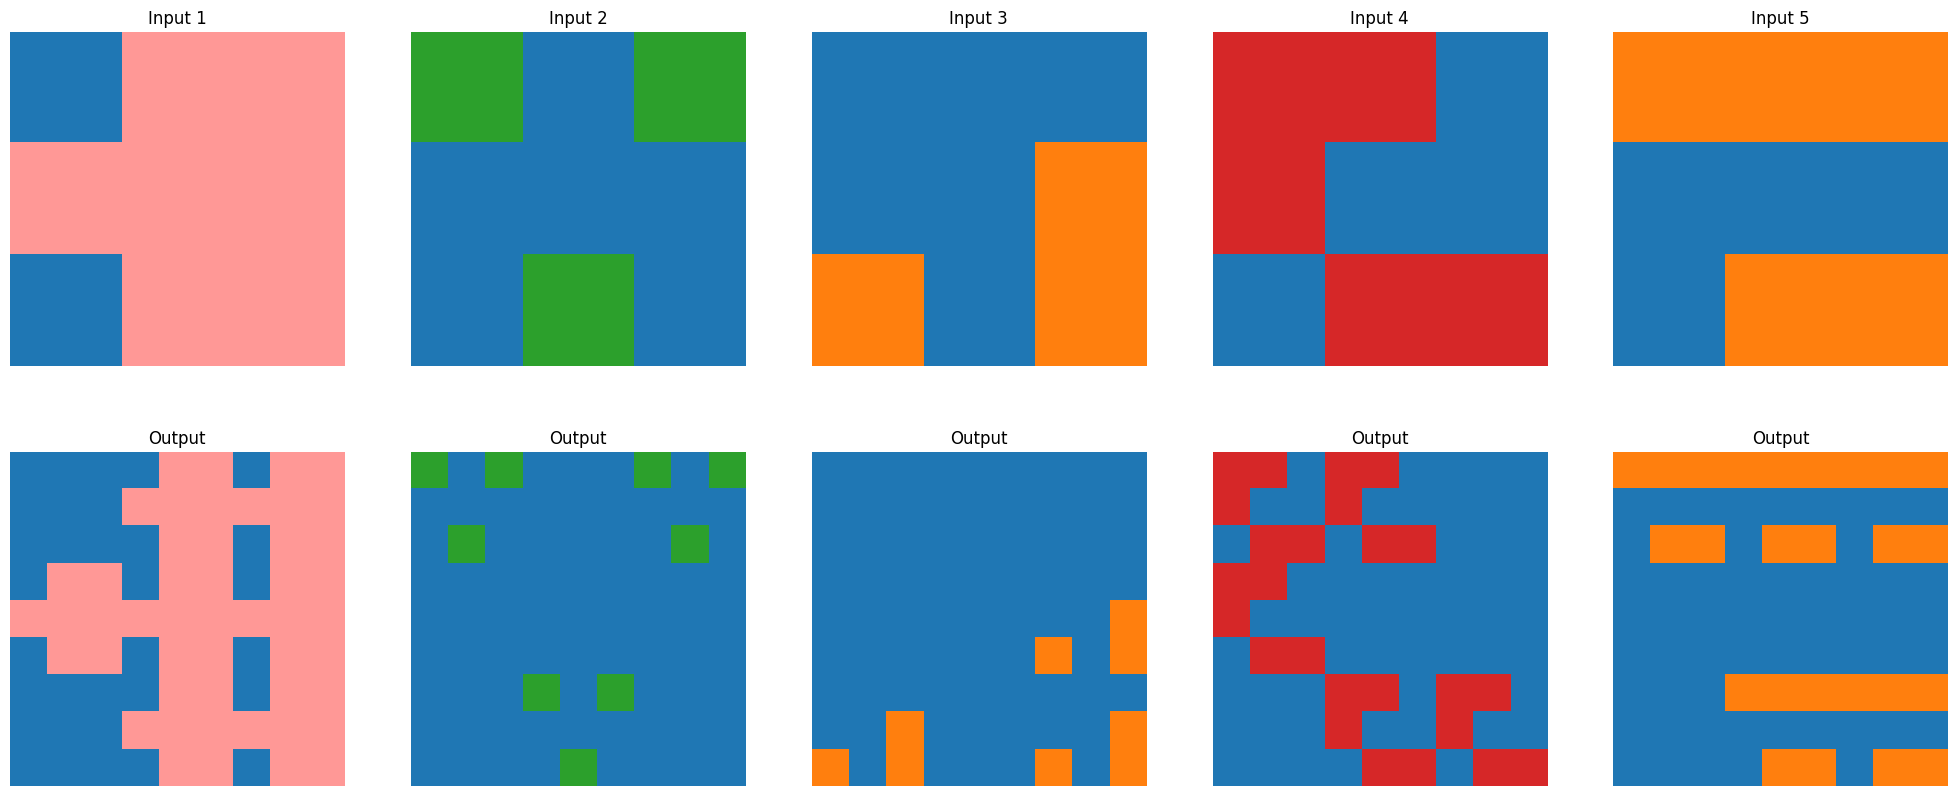

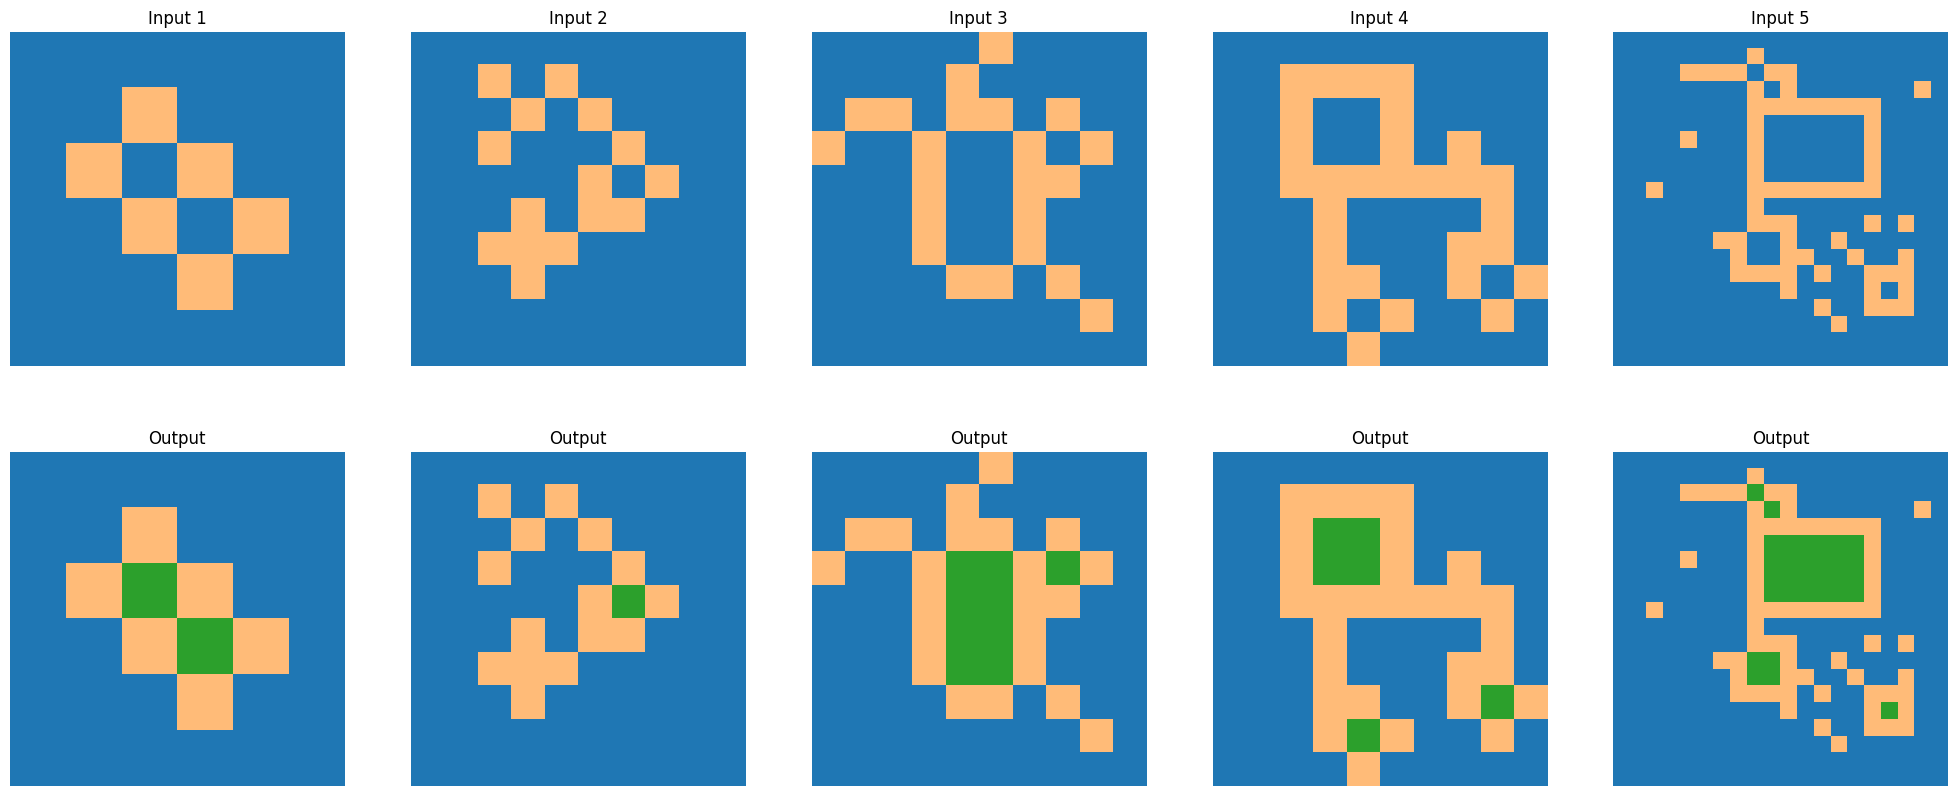

In [153]:
# Define function to visualize each data
colors = ["White", "Black", "Red", "Green", "Blue", "Yellow", "Magenta", "Cyan", "Orange"]

def visualize_from_data(input_data, output_data=None):
    """
    Visualize input and output data
    :param input_data: input data
    :param output_data: output data

    :return: None
    """

    num_inputs = len(input_data)
    has_output = 1 if output_data is not None else 0

    # If we have output data, we want 2 rows; otherwise, just 1 row
    num_rows = 2 if has_output else 1
    num_cols = num_inputs

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

    if num_cols == 1:
        axes = np.array([[axes]]) if has_output else np.array([axes])  # Ensure axes is always 2D array
    elif num_rows == 1:
        axes = np.array([axes])

    for i, data in enumerate(input_data):
        ax = axes[0, i] if has_output else axes[0][i]
        ax.imshow(data, cmap='tab20', norm=plt.Normalize(0, 19))
        ax.set_title(f"Input {i + 1}")
        ax.axis('off')

    if output_data is not None:
        for i, data in enumerate(output_data):
            ax = axes[1, i]
            ax.imshow(data, cmap='tab20', norm=plt.Normalize(0, 19))
            ax.set_title("Output")
            ax.axis('off')

    plt.show()

def visualize_from_id(id, dataframe, solution=True):
    _, _, input_data, output_data = filter_data_by_id(id, dataframe, solution)
    visualize_from_data(input_data, output_data)

visualize_from_data(c, d)

visualize_from_id('00d62c1b', training_challenges_df)

In [154]:
train_set = []
eval_set = []
test_set = []

for i in range(len(train_ids)):
    a, b, c, d = filter_data_by_id(train_ids[i], training_challenges_df)
    train_set.append({'id': train_ids[i], 'input': c, 'output': d})
    e, f, g, h = filter_data_by_id(eval_ids[i], evaluation_challenges_df)
    eval_set.append({'id': eval_ids[i], 'input': g, 'output': h})

for i in range(len(test_ids)):
    i, j, k = filter_data_by_id(test_ids[i], test_challenges_df, solution=False)
    test_set.append({'id': test_ids[i], 'input': k})

train_set_df = pd.DataFrame(train_set)
eval_set_df = pd.DataFrame(eval_set)
test_set_df = pd.DataFrame(test_set)

display(train_set_df.head())
    

,id,input,output
0,007bbfb7,"[[[0, 7, 7], [7, 7, 7], [0, 7, 7]], [[4, 0, 4]...","[[[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7,..."
1,00d62c1b,"[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ...","[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ..."
2,017c7c7b,"[[[0, 1, 0], [1, 1, 0], [0, 1, 0], [0, 1, 1], ...","[[[0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 2], ..."
3,025d127b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 0,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 6, 6,..."
4,045e512c,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [155]:
def standardize_data(data):
    temp_data = data.copy()
    for i in range(len(temp_data)):
        for j in range(len(temp_data[i])):
            while len(temp_data[i][j]) < 30:
                temp_data[i][j].append(-1)
        while len(temp_data[i]) < 30:
            temp_data[i].append([-1 for k in range(30)])

    return 

train_set_df['standardized_input'] = train_set_df['input'].apply(lambda x: standardize_data(x))
train_set_df['standardized_output'] = train_set_df['output'].apply(lambda x: standardize_data(x))
eval_set_df['standardized_input'] = eval_set_df['input'].apply(lambda x: standardize_data(x))
eval_set_df['standardized_output'] = eval_set_df['output'].apply(lambda x: standardize_data(x))
test_set_df['standardized_input'] = test_set_df['input'].apply(lambda x: standardize_data(x))

display(train_set_df.head())

,id,input,output,standardized_input,standardized_output
0,007bbfb7,"[[[0, 7, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1...","[[[0, 0, 0, 0, 7, 7, 0, 7, 7, -1, -1, -1, -1, ...",None,None
1,00d62c1b,"[[[0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -...","[[[0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -...",None,None
2,017c7c7b,"[[[0, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1...","[[[0, 2, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1...",None,None
3,025d127b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, ...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, ...",None,None
4,045e512c,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",None,None


In [156]:
# most ml models have a specific input shape that they expect
# making everythign 30x30
# convert the whole thing to an image




# Model ideas
# 1. CNN
# 2. S4 -> sequence model, 4 ways 
# Transformer
# Ensembling 

